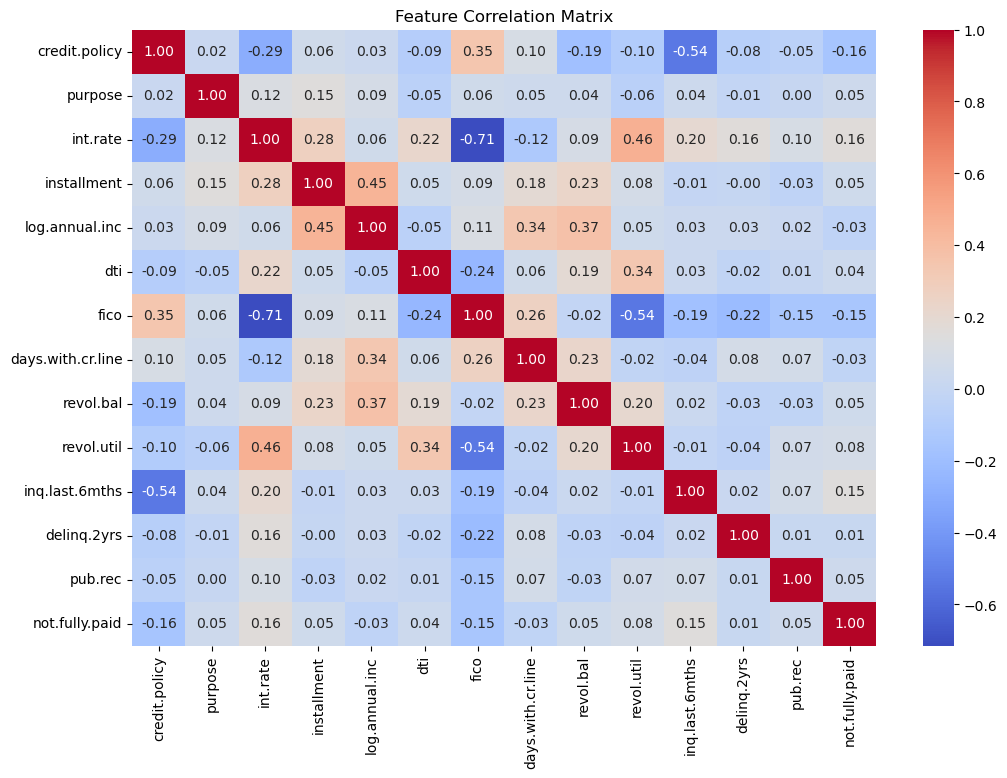

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score

# ML Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score
from imblearn.over_sampling import SMOTE
from scipy.stats import ttest_rel

# ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


# 1. Load Dataset

df = pd.read_csv("loan_data.csv")  # Replace with your actual filename


# Encode categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Fill missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()




In [2]:
# Define features and target
# target_col = "not.fully.paid"  # Update this to your actual target column name
# X = df.drop(target_col, axis=1)
# y = df[target_col]

features_to_drop = [
    'int.rate',          
    'pub.rec',
    'delinq.2yrs'
]
target_col = 'not.fully.paid'
X = df.drop( features_to_drop + [ target_col], axis=1)
y = df[target_col]

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 3. SMOTE apply

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


# 4. Split the Data

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)



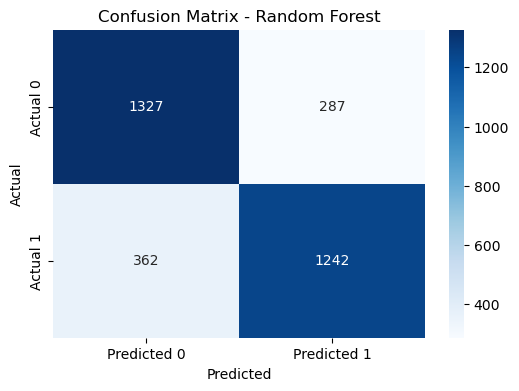

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10)
# rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)


cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

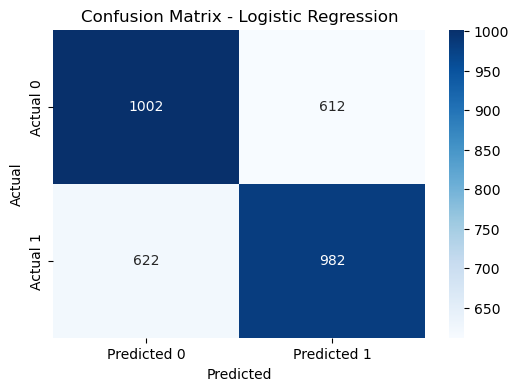

In [4]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)



cm = confusion_matrix(y_test, lr_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


C:\Users\sahaa\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:11:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1614
           1       0.92      0.84      0.88      1604

    accuracy                           0.88      3218
   macro avg       0.88      0.88      0.88      3218
weighted avg       0.88      0.88      0.88      3218



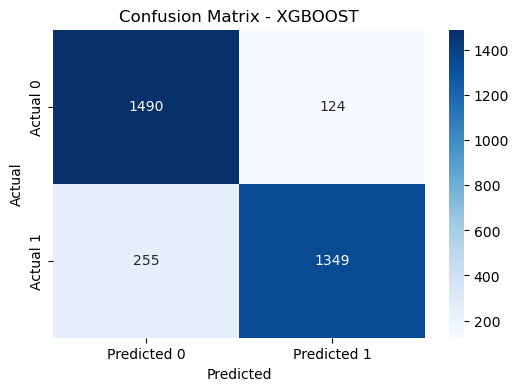

In [5]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
print(classification_report(y_test, xgb_preds))

cm = confusion_matrix(y_test, xgb_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - XGBOOST')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()




In [6]:
# ANN

from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

ann = Sequential([
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

ann.compile(optimizer=Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)
ann_preds = (ann.predict(X_test) > 0.5).astype("int32")



Epoch 1/50
403/403 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6094 - loss: 0.6567 - val_accuracy: 0.6212 - val_loss: 0.6323
Epoch 2/50
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6382 - loss: 0.6249 - val_accuracy: 0.6327 - val_loss: 0.6272
Epoch 3/50
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6541 - loss: 0.6163 - val_accuracy: 0.6445 - val_loss: 0.6221
Epoch 4/50
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6610 - loss: 0.6102 - val_accuracy: 0.6464 - val_loss: 0.6165
Epoch 5/50
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6646 - loss: 0.6032 - val_accuracy: 0.6495 - val_loss: 0.6069
Epoch 6/50
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6723 - loss: 0.5985 - val_accuracy: 0.6588 - val_loss: 0.6022
Epoch 7/50
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6785 - loss: 0.5905 - val_accuracy: 0.6579 - val_loss: 0.6097
Epoch 8/50
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6883 - loss: 0.5817 - val_accuracy: 0.

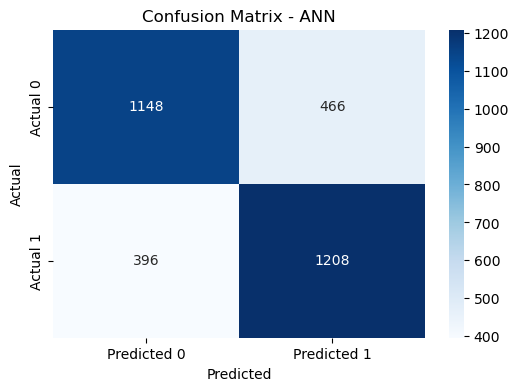

In [7]:
cm = confusion_matrix(y_test, ann_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - ANN')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [8]:

# 6. Evaluation

models = {
    "Random Forest": rf_preds,
    "Logistic Regression": lr_preds,
    "XGBoost": xgb_preds,
    "ANN": ann_preds
}

for name, preds in models.items():
    print(f"\n==== {name} Classification Report ====")
    print(classification_report(y_test, preds))




==== Random Forest Classification Report ====
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1614
           1       0.81      0.77      0.79      1604

    accuracy                           0.80      3218
   macro avg       0.80      0.80      0.80      3218
weighted avg       0.80      0.80      0.80      3218


==== Logistic Regression Classification Report ====
              precision    recall  f1-score   support

           0       0.62      0.62      0.62      1614
           1       0.62      0.61      0.61      1604

    accuracy                           0.62      3218
   macro avg       0.62      0.62      0.62      3218
weighted avg       0.62      0.62      0.62      3218


==== XGBoost Classification Report ====
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1614
           1       0.92      0.84      0.88      1604

    accuracy                           0.